# Credit Amount EDA Case Study

In [116]:
import pandas as pd

In [4]:
data_dict = pd.read_csv("columns_description.csv")
data_dict.head(100)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [5]:

import warnings

warnings.filterwarnings('ignore')

In [6]:
#importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline   


In [9]:
plt.style.use('ggplot')

In [10]:
credit_data = pd.read_csv("application_data.csv")
credit_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
import seaborn as sns

In [12]:
import pandas as pd
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
# Checking shape of the data

credit_data.shape

(307511, 122)

In [14]:
# Checking 5 point summary with describe function

credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [16]:
# Null % for all columns in data

null_perc = credit_data.isnull().sum()/len(credit_data)*100

In [17]:
# Top 60 cols with maximum null % 

null_perc.sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [18]:
# Filtered list of Columns & NULL counts where NULL values are more than 45%
null_col = credit_data.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.45*len(credit_data))]
null_col

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [19]:
num=len(null_col)
print("There are "+ str(num) + " columns with more than 45% NULLs")


There are 49 columns with more than 45% NULLs


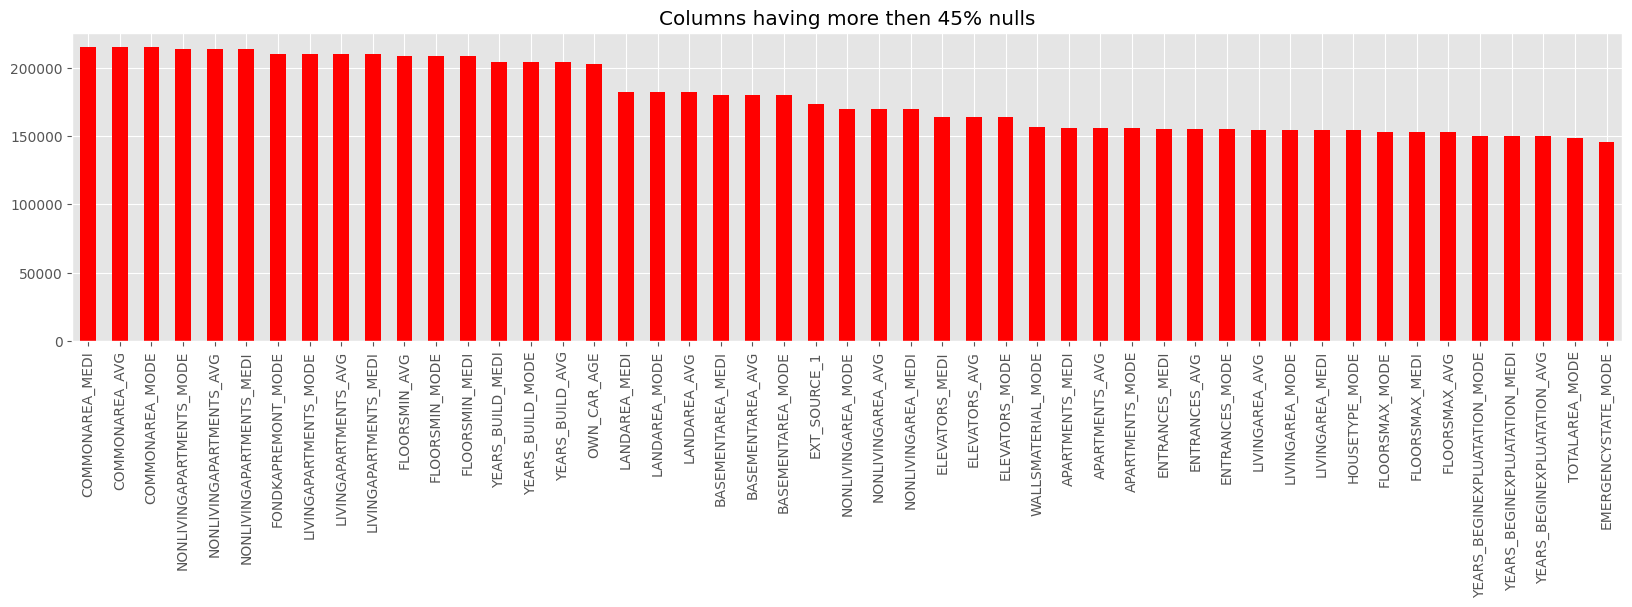

In [24]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="red")
plt.title('Columns having more then 45% nulls')
plt.show()

In [25]:
# Function to remove the columns having percentage of null values > 45%
def remove_null_cols(data):
    perc=0.45                                                           
    df = data.copy()                                                      
    shape_before = df.shape                                               
    remove_cols = (df.isnull().sum()/len(df))                             
    remove_cols = list(remove_cols[remove_cols.values>=perc].index)       
    df.drop(labels = remove_cols,axis =1,inplace=True)                   
    print("Number of Columns dropped\t: ",len(remove_cols))    
    print("\nOld dataset rows,columns",shape_before,"\nNew dataset rows,columns",df.shape)
    return df

In [26]:
# Removing cols with more than 45% nulls.


credit_data_1 = remove_null_cols(credit_data)

Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [28]:
null_perc_1 = credit_data_1.isnull().sum()/len(credit_data_1)*100
null_perc_1.sort_values(ascending = False).head(60)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [29]:
# Checking value counts for AMT_REQ_CREDIT_BUREAU_YEAR
credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()


0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [30]:
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_QRT.mode())

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [31]:
credit_data_2 = credit_data_1.copy() 

In [32]:
# Imputing null with 0s

impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

for i in impute_list:
        credit_data_2[i] = credit_data_1[i].fillna(0)
                         


In [33]:
#count of NULLs after imputaion

print(credit_data_2['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

0
0
0
0
0
0


In [35]:
# value counts for AMT_ANNUITY

credit_data_1.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [36]:
credit_data_1.AMT_ANNUITY.isna().sum()

12

In [37]:
# median for AMT_ANNUITY

credit_data_1.AMT_ANNUITY.median()
# since top 2 counts are closed to each other so we take median

24903.0

In [38]:
# imputing NULLs with Median

credit_data_2['AMT_ANNUITY'] = credit_data_1['AMT_ANNUITY'].fillna(credit_data_1['AMT_ANNUITY'].median())
credit_data_2['AMT_ANNUITY'].isnull().sum()

0

In [30]:
# value counts for AMT_GOODS_PRICE

credit_data_1.AMT_GOODS_PRICE.value_counts() 

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

In [39]:
credit_data_1.AMT_GOODS_PRICE.isna().sum()

278

In [31]:
# median for AMT_GOODS_PRICE

credit_data_1.AMT_GOODS_PRICE.median()

450000.0

In [40]:
# Imputing NULLs with Median

credit_data_2['AMT_GOODS_PRICE'] = credit_data_1['AMT_GOODS_PRICE'].fillna(credit_data_1['AMT_GOODS_PRICE'].median())

In [42]:
#count of NULLs to be 0

credit_data_2['AMT_GOODS_PRICE'].isnull().sum()

0

In [43]:
#  DAYS fields have -ve values

print(credit_data['DAYS_BIRTH'].unique())
print(credit_data['DAYS_EMPLOYED'].unique())
print(credit_data['DAYS_REGISTRATION'].unique())
print(credit_data['DAYS_ID_PUBLISH'].unique())
print(credit_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [44]:
# Preparing the list of columns to be treated

erroneous_cols = [cols for cols in credit_data_2 if cols.startswith('DAYS')]
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [45]:
credit_data_2[erroneous_cols]= abs(credit_data_2[erroneous_cols])

In [46]:
credit_data_2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.0000

In [47]:
# value counts for CODE_GENDER

credit_data_2.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [55]:
# Replacing XNA with F
credit_data_2['CODE_GENDER']=credit_data_2['CODE_GENDER'].str.replace('XNA','F')

In [56]:
credit_data_2['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [57]:
# value counts for ORGANIZATION_TYPE

credit_data_2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [58]:
# Replacing XNAs with Nulls

credit_data_2['ORGANIZATION_TYPE'] = credit_data_1['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [59]:
# Checking value counts for credit_data_2

credit_data_2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [61]:
# Using pd.qcut function to bin AMT_INCOME_TOTAL into 5 categories

credit_data_2['AMT_INCOME_RANGE'] = pd.qcut(credit_data_2.AMT_INCOME_TOTAL, 
                                            q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                            labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data_2['AMT_INCOME_RANGE'].head(7)

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
5    VERY_LOW
6      MEDIUM
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [62]:
# Using pd.qcut function to bin AMT_CREDIT_RANGE into 5 categories

credit_data_2['AMT_CREDIT_RANGE'] = pd.qcut(credit_data_2.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data_2['AMT_CREDIT_RANGE'].head(7)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [63]:
# Binning DAYS_BIRTH into 5 categories

credit_data_2['DAYS_BIRTH']= (credit_data_2['DAYS_BIRTH']/365).astype(int)
credit_data_2['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [65]:
# Using pd.qcut function to bin DAYS_BIRTH into 5 categories

credit_data_2['DAYS_BIRTH_BINS']=pd.cut(credit_data_2['DAYS_BIRTH'], 
                                      bins=[19,25,35,60,100], 
                                      labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [66]:
# value counts for DAYS_BIRTH_BINS

credit_data_2['DAYS_BIRTH_BINS'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_BINS, dtype: int64

In [69]:
# Slitting data as per TARGET into deafulter and non-defaulter datasets

defaulter = credit_data_2[credit_data_2.TARGET==1]
non_defaulter =  credit_data_2[credit_data_2.TARGET==0]

In [75]:
defaulter.shape

(24825, 76)

In [77]:
# row counts of data split as per TARGET

print(" Defaulter data shape - " , defaulter.shape )
print(" Non-Defaulter data shape - " , non_defaulter.shape )

 Defaulter data shape -  (24825, 76)
 Non-Defaulter data shape -  (282686, 76)


In [88]:
print('Defaulter data %age split',round(len(defaulter)/len(credit_data_2)*100,2))
print('Non-defaulter data %age split',round(len(non_defaulter)/len(credit_data_2)*100,2))

Defaulter data %age split 8.07
Non-defaulter data %age split 91.93


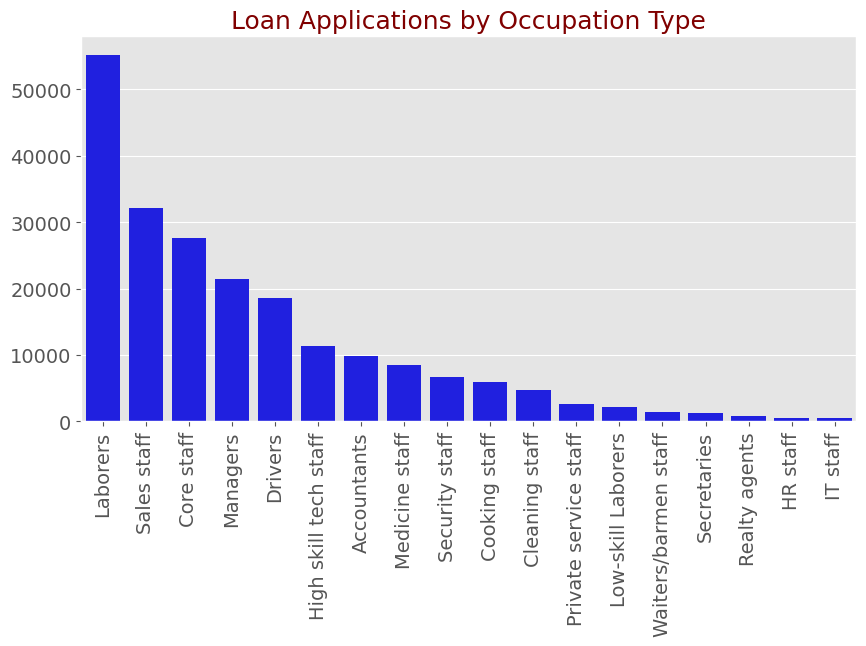

In [92]:
# Distribution of 'OCCUPATION_TYPE'

temp = credit_data_2["OCCUPATION_TYPE"].value_counts()                      
sns.barplot(x=temp.index, y = temp.values, color = 'blue')                
plt.xticks(rotation=90, size = 14)                
plt.yticks( size = 14)                                                    
plt.title('Loan Applications by Occupation Type', size=18,color = 'maroon')
plt.show()

Text(0.5, 1.0, 'Loan Applications by Organization Type')

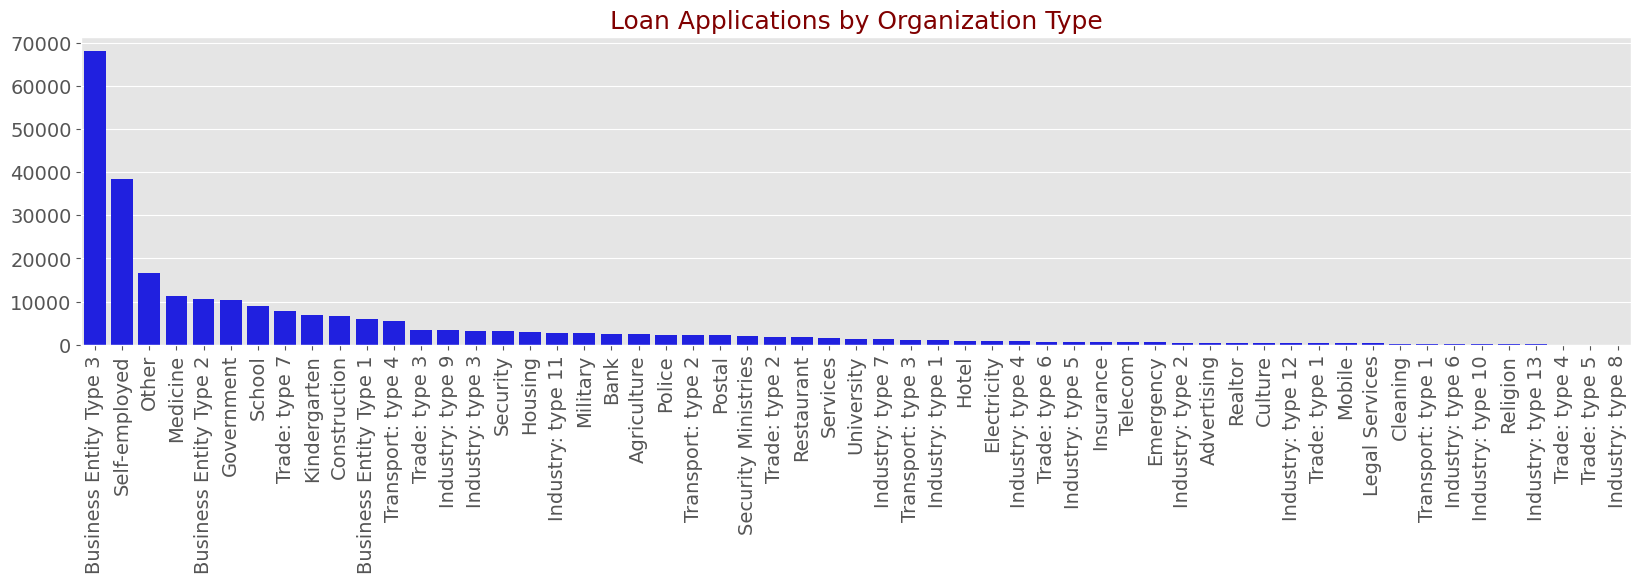

In [93]:
# Distribution of 'Organization Type'
plt.figure(figsize=(20,4))
temp = credit_data_2["ORGANIZATION_TYPE"].value_counts()
sns.barplot(x=temp.index, y = temp.values, color = 'blue')
plt.xticks(rotation=90, size = 14)
plt.yticks( size = 14)
plt.title('Loan Applications by Organization Type', size=18,color = 'maroon')

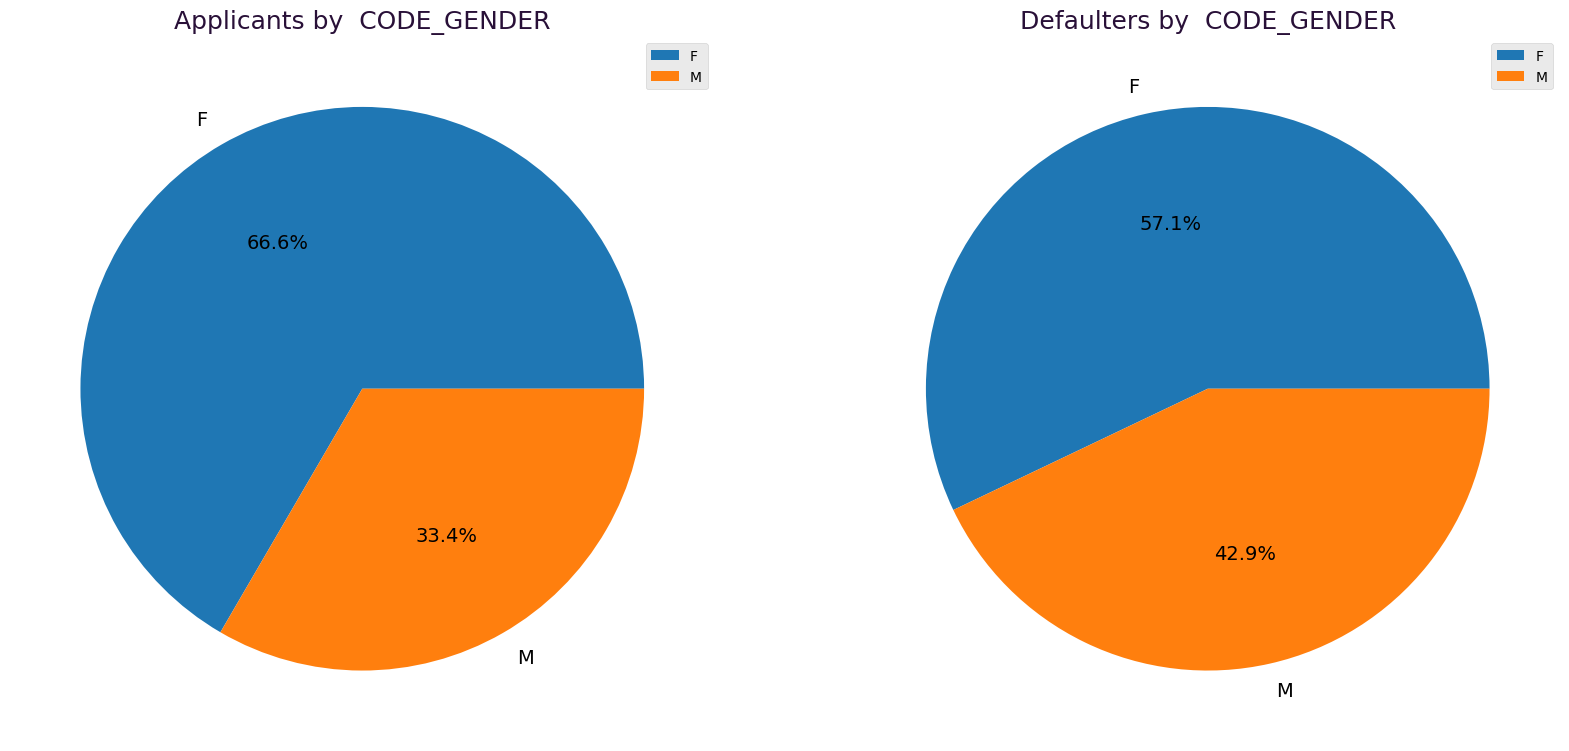

In [97]:
##  Comparison of Gender Applicants Distribution among Defaulters and Non-Defaulters 

colors = sns.color_palette('tab10')[0:5]                   

fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))   
axes[0].set_title("Box Plot of  " )                        
data = non_defaulter['CODE_GENDER'].value_counts()         
data_df = pd.DataFrame({'labels': data.index,'values': data.values})     

# Pie chart for Subplot 1 ( Non Defaulter part )
_=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
_=axes[0].set_title('Applicants by  '+'CODE_GENDER', size=18,color = '#291038')
_=axes[0].legend()

# Pie chart for Subplot 2 ( Defaulter part )
axes[1].set_title("Box Plot of  " )
data = defaulter['CODE_GENDER'].value_counts()
data_df = pd.DataFrame({'labels': data.index,'values': data.values})
_=axes[1].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
_=axes[1].set_title('Defaulters by  '+'CODE_GENDER', size=18,color = '#291038')
_=axes[1].legend()

In [98]:
# Function for Univariate Comarison

def univariate_comparison(col,hue=None):
    colors = sns.color_palette('tab10')[0:5]

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))
    axes[0].set_title("Box Plot of  " )
    data = non_defaulter[col].value_counts()
    data_df = pd.DataFrame({'labels': data.index,'values': data.values})
    _=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
    _=axes[0].set_title('Applicants by  '+col, size=18,color = '#291038')
    _=axes[0].legend()

    axes[1].set_title("Box Plot of  " )
    data = defaulter[col].value_counts()
    data_df = pd.DataFrame({'labels': data.index,'values': data.values})
    _=axes[1].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
    _=axes[1].set_title('Defaulters by  '+col, size=18,color = '#291038')
    _=axes[1].legend()

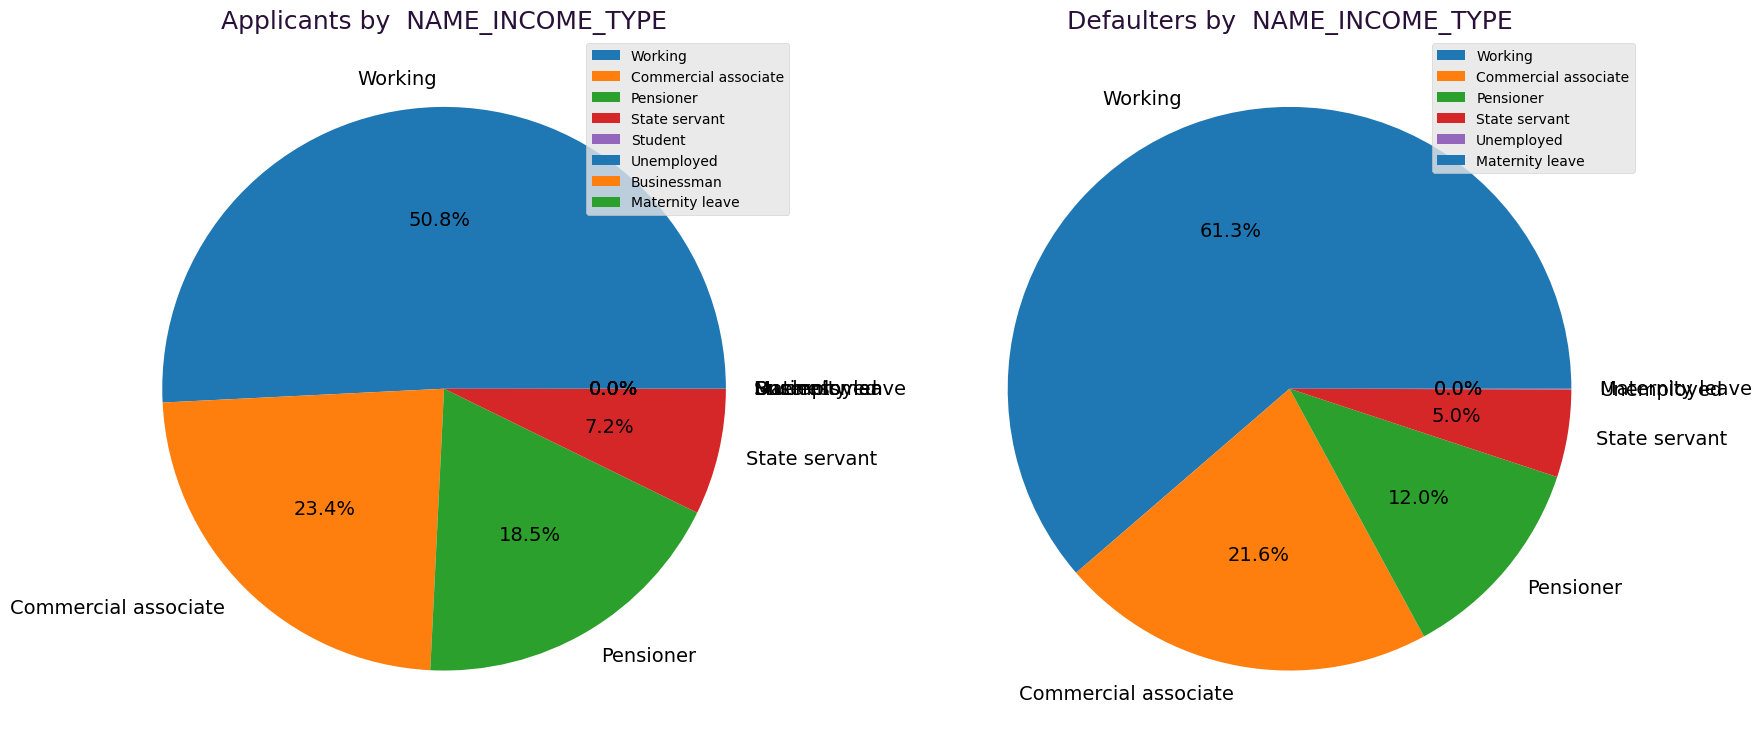

In [99]:
# Comparison of Income Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_INCOME_TYPE')

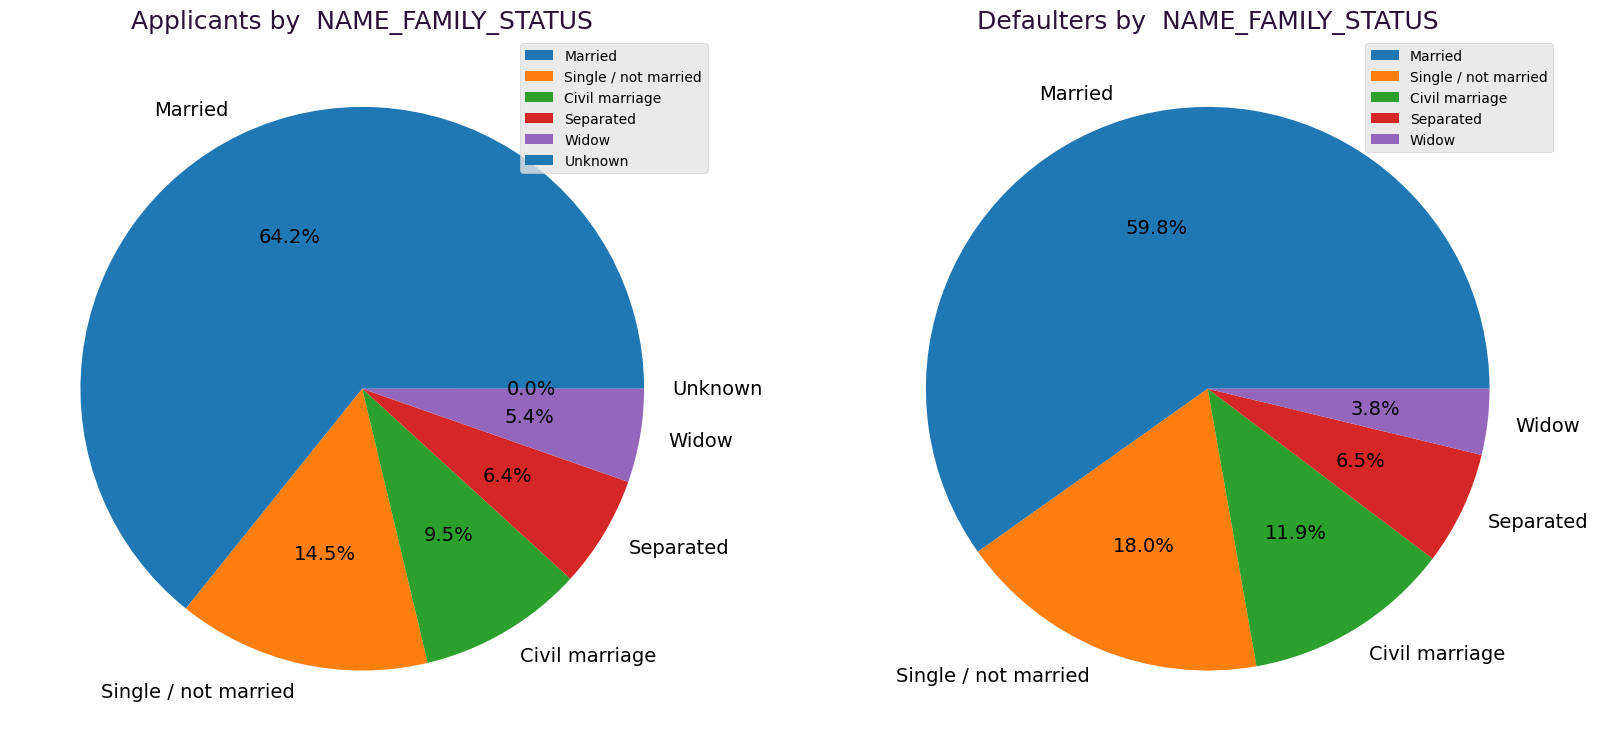

In [100]:
# Comparison of Family Status Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_FAMILY_STATUS')

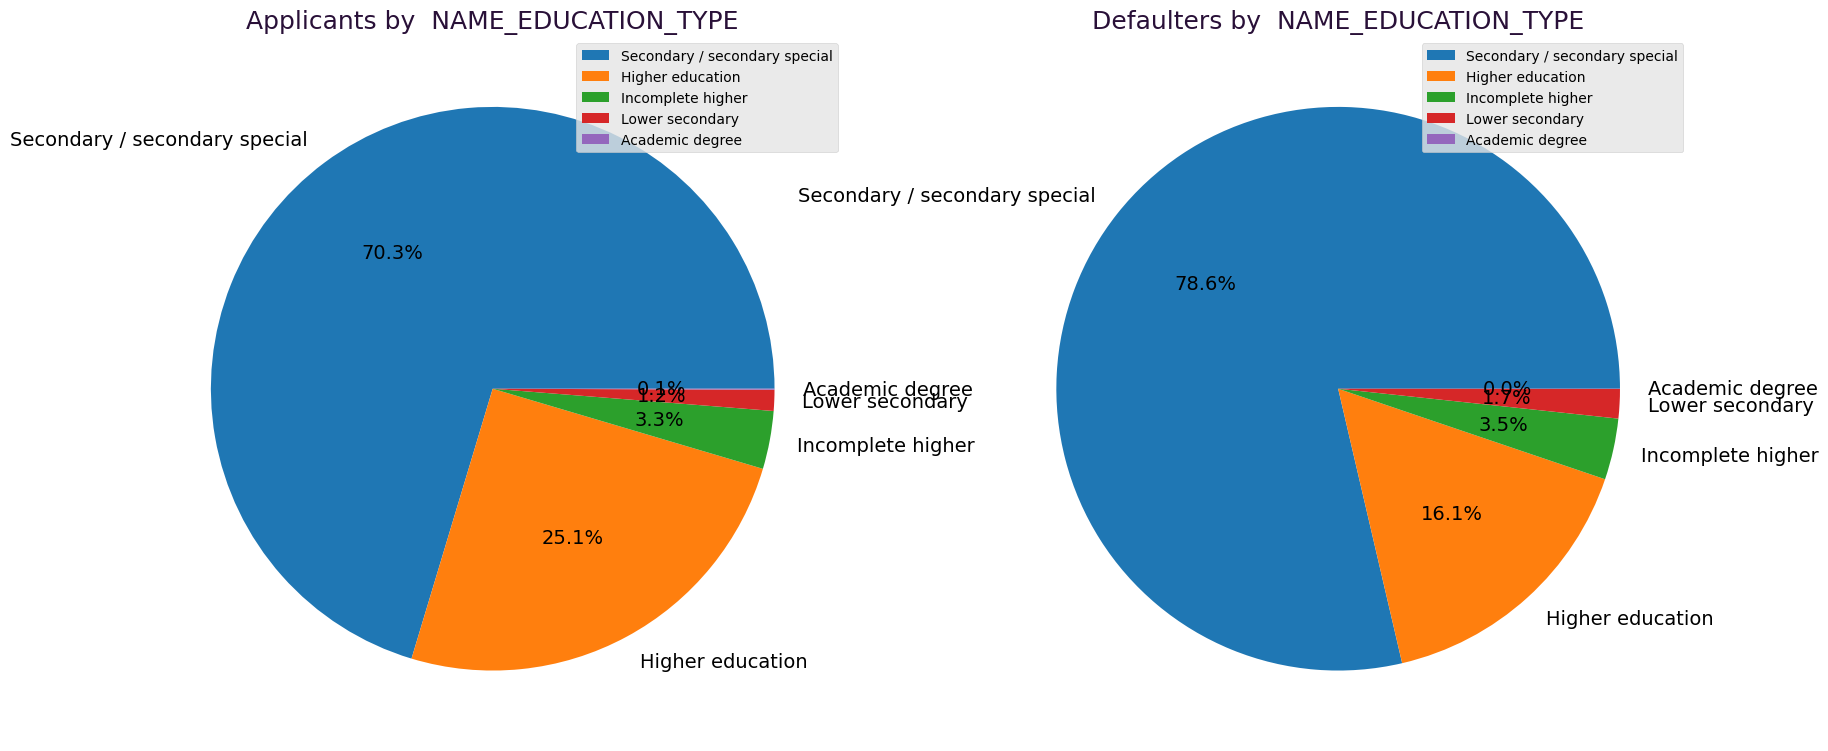

In [102]:
# Comparison of Education Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_EDUCATION_TYPE')

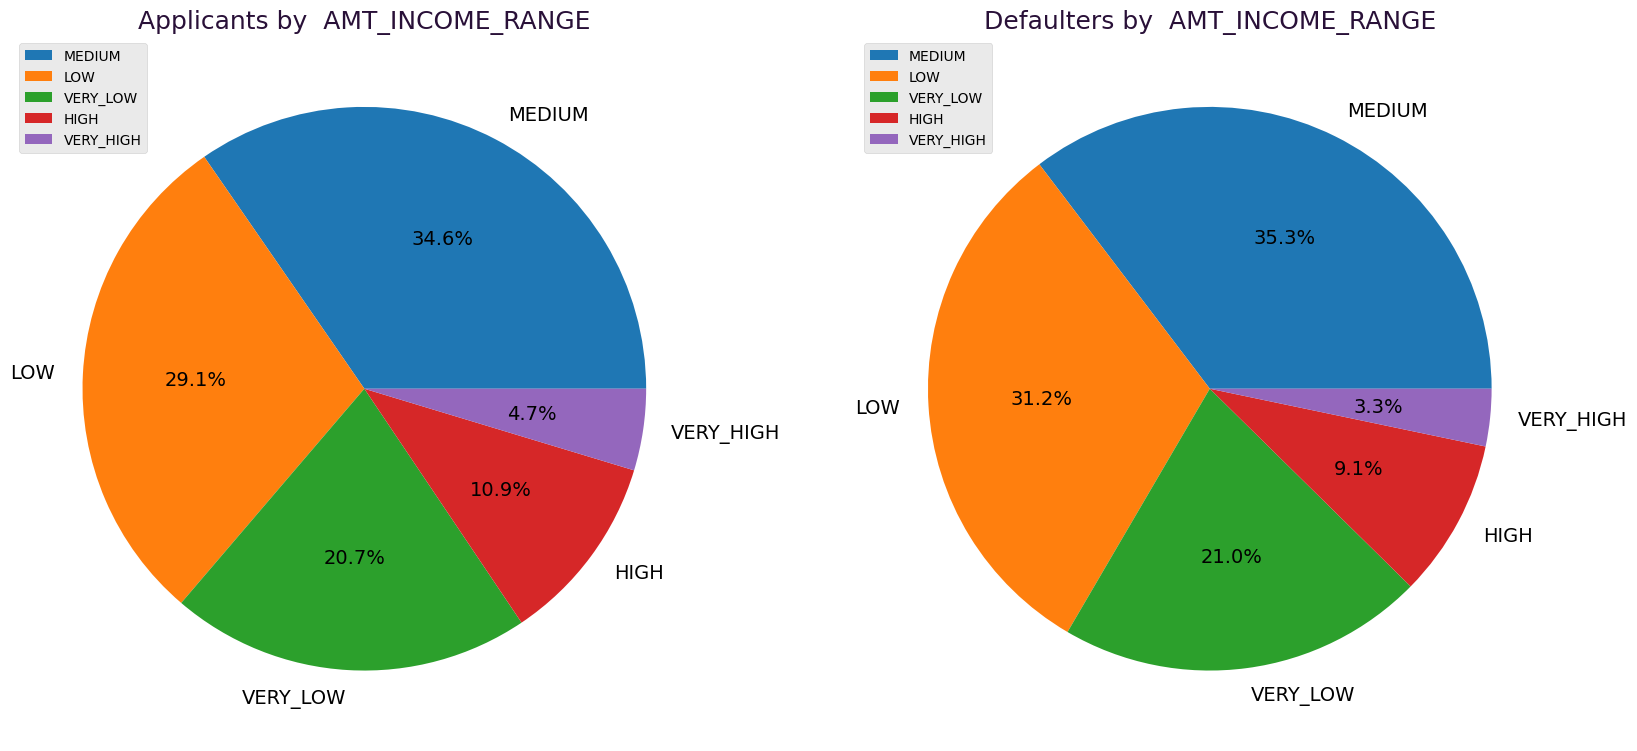

In [59]:
# Comparison of Income Range Distribution among Defaulters and Non Defaulters

univariate_comparison('AMT_INCOME_RANGE')

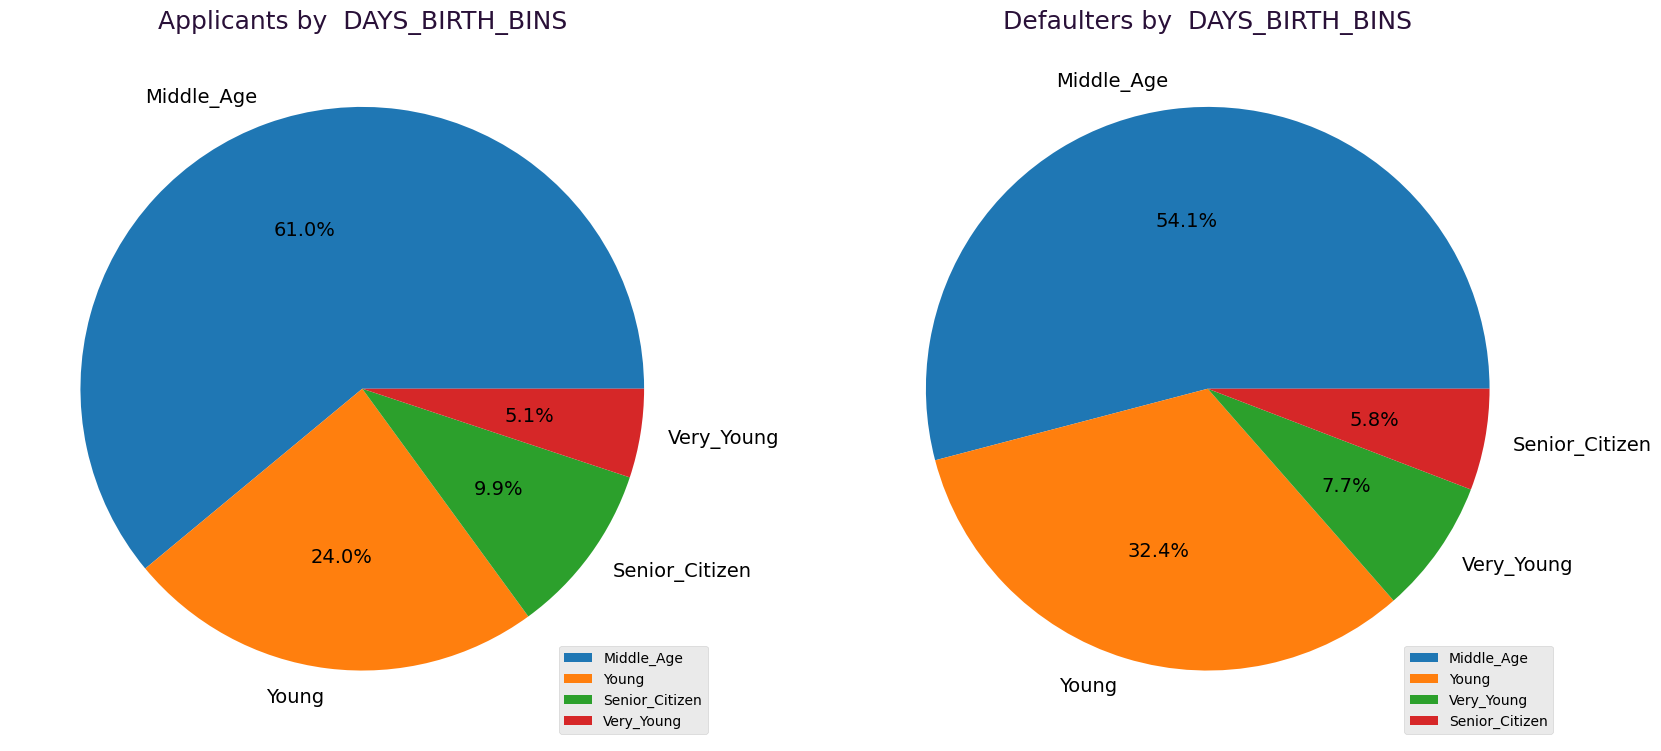

In [60]:
# Comparison of Age Distribution among Defaulters and Non Defaulters

univariate_comparison('DAYS_BIRTH_BINS')

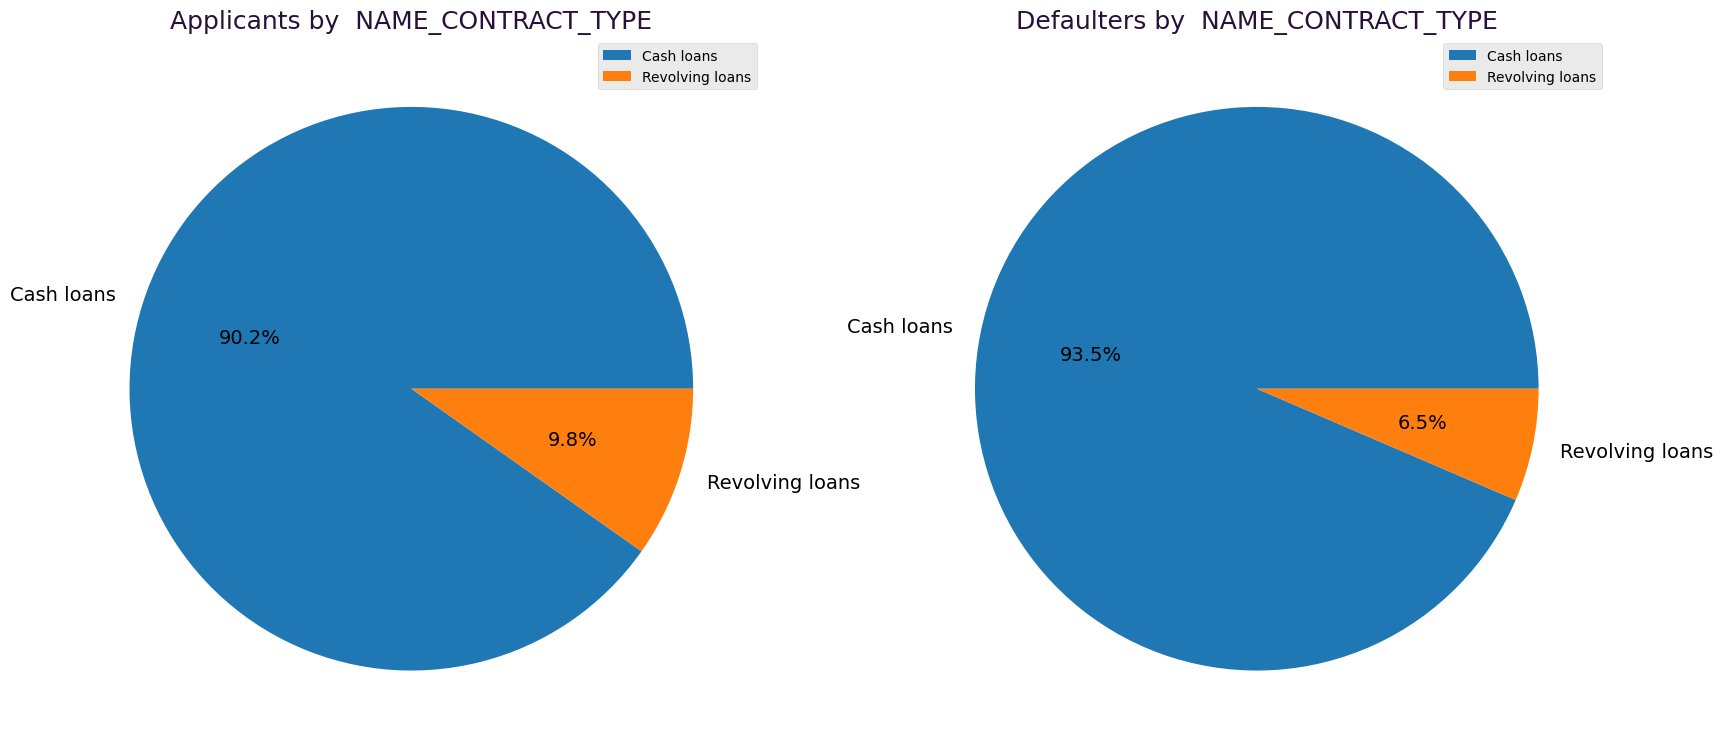

In [61]:
# Comparison of Loan Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_CONTRACT_TYPE')

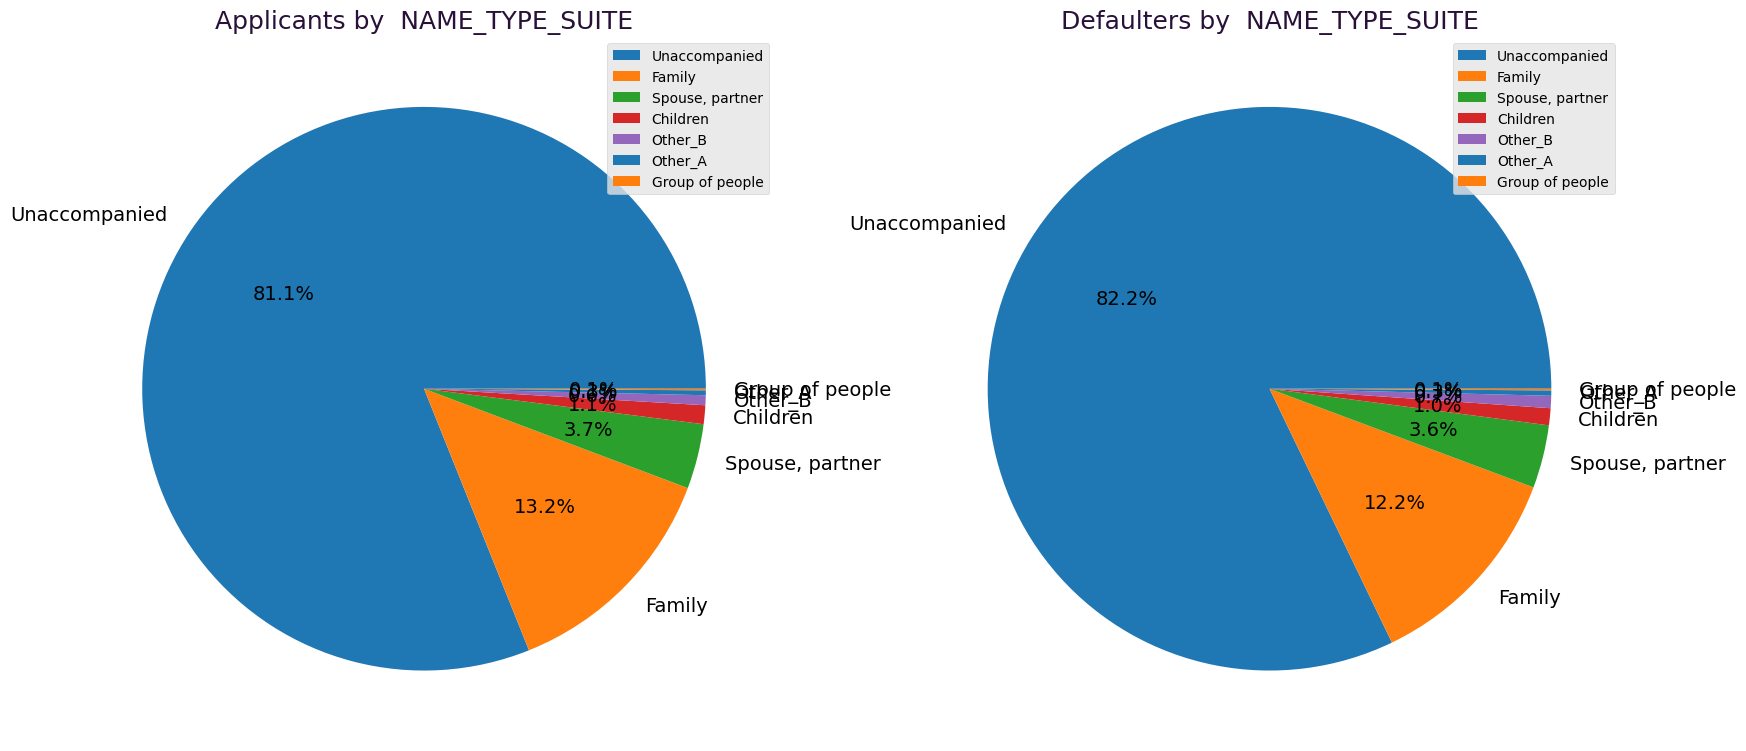

In [104]:
# Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_TYPE_SUITE')

In [105]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_comparison_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      
    axes[0,0].set_title("Displot (Non-Defaulter) for  " + col )                  
    sns.distplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[0,0], color="#4CB391")


    axes[0,1].set_title("Displot (Defaulter) for  " + col )                       
    sns.distplot(defaulter[~defaulter[col].isna()][col],ax=axes[0,1], color="#4CB391") 
    
    axes[1,0].set_title("Boxplot (Non-Defaulter) for  " + col )                  
    sns.boxplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[1,0], color="#4CB391") 

    axes[1,1].set_title("Boxplot (Defaulter) for  " + col )
    sns.boxplot(defaulter[~defaulter[col].isna()][col],ax=axes[1,1], orient='h',color="#4CB391") 

    plt.tight_layout()

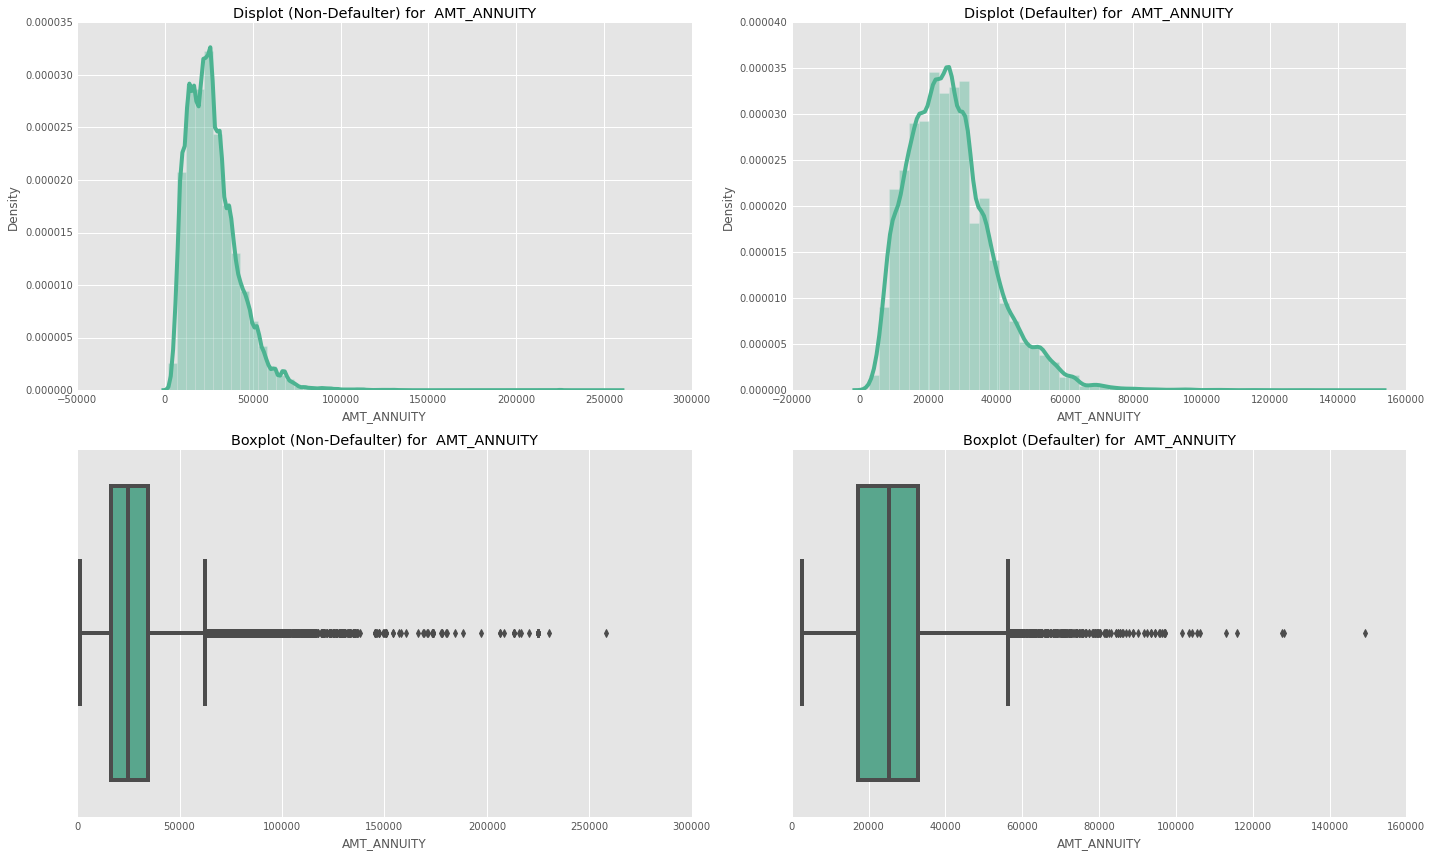

In [ ]:
# Univariate Analysis for Annuity Amount

univariate_comparison_quant('AMT_ANNUITY')

In [108]:
# Function for Multivariate analysis

def multivariate(col1,col2,col3):                                            

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))               
    
    axes[0].set_title("Boxplot (Non-Defaulter) for  "  )
    _=sns.boxplot(data=non_defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[0])
    _=axes[0].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Non-Defaulter)', size=15,color = 'blue')

    axes[1].set_title("Boxplot (Defaulter) for  "  )
    _=sns.boxplot(data=defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[1])
    _=axes[1].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Defaulter)', size=15,color = 'blue')


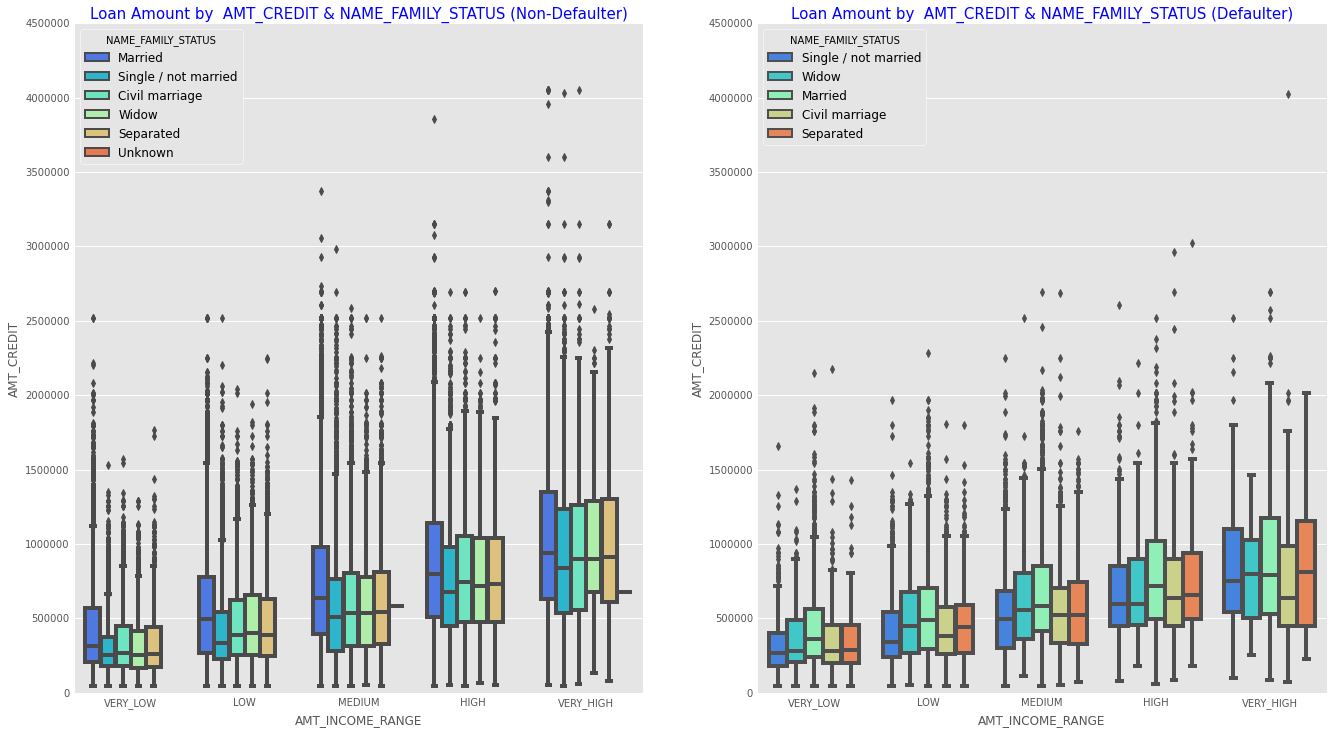

In [ ]:
# Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

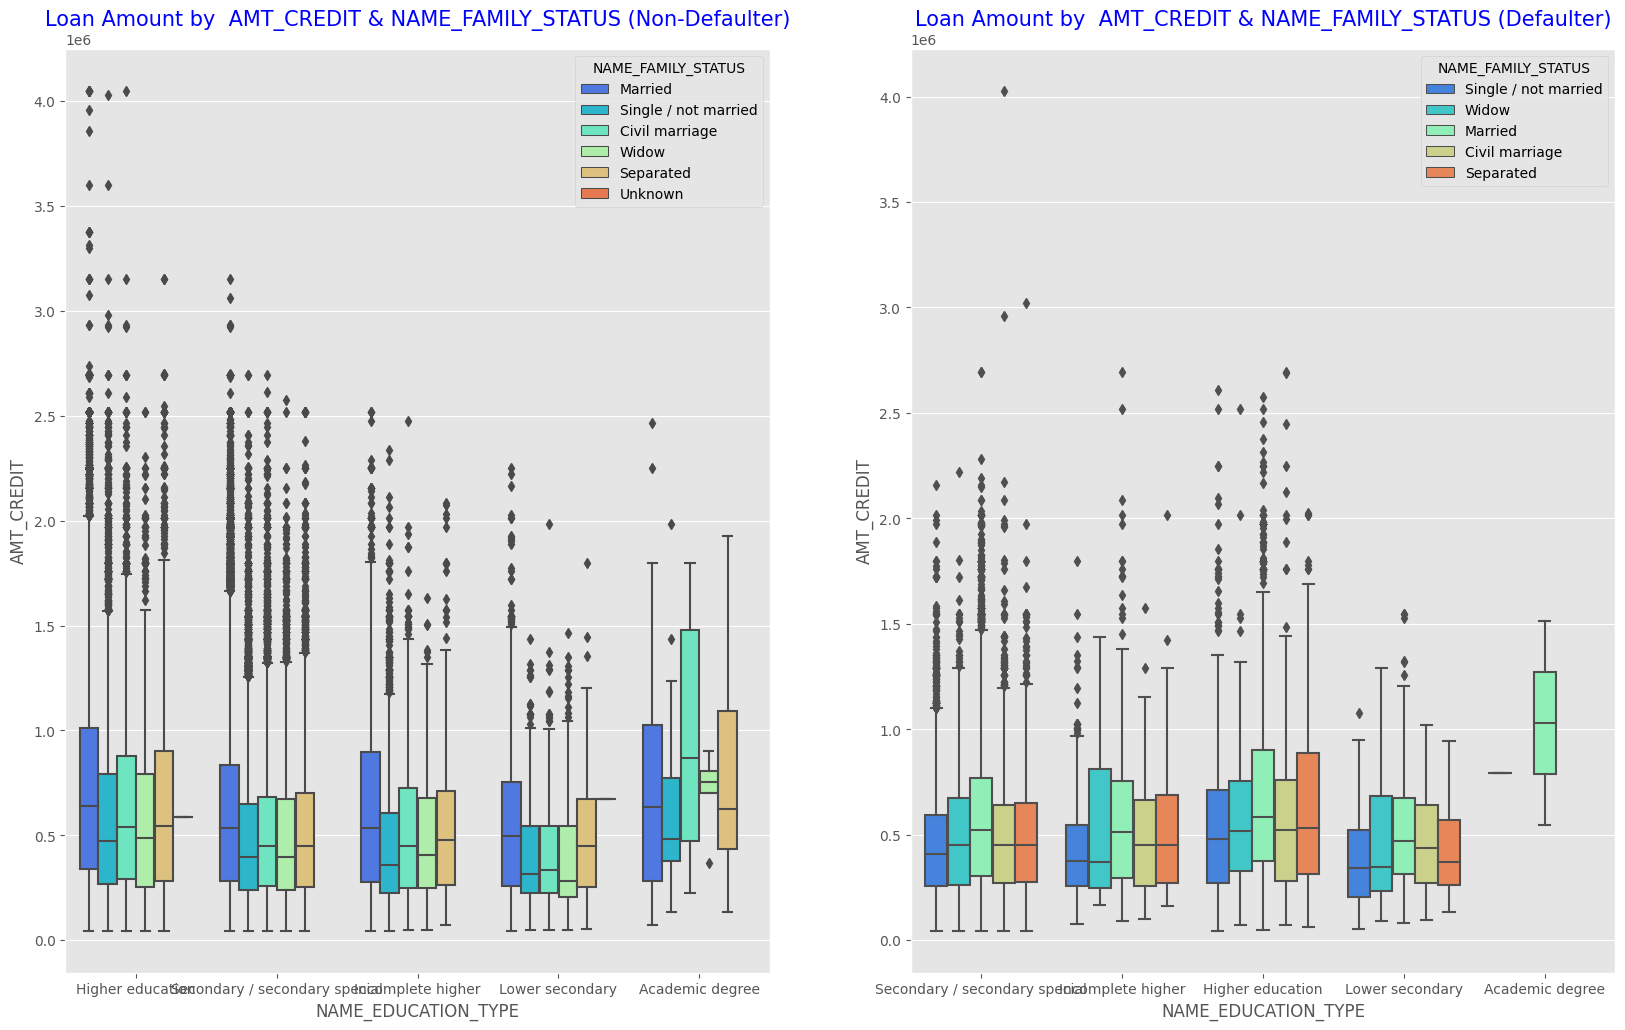

In [67]:
# Analysis of NAME_EDUCATION_TYPE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

In [109]:
# Defining function for drilldown analysis

def perc_defaulters(col):

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    
    total = credit_data_2[[col,'TARGET']].groupby(col).count()
    defaulter_1 = defaulter[[col,'TARGET']].groupby(col).count()
    perc = defaulter_1*100/total
    
    axes[0].set_title("Application Counts by  "+ col  )
    _=sns.barplot(x=total.index,y=total.TARGET,color='grey',order=total.sort_values('TARGET',ascending=False).index,ax=axes[0])
    _=axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

    axes[1].set_title("Defaulter % by " + col  )
    _=sns.barplot(x=perc.index,y=perc.TARGET,color='#ff597d',order=perc.sort_values('TARGET',ascending=False).index,ax=axes[1])
    _=axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')


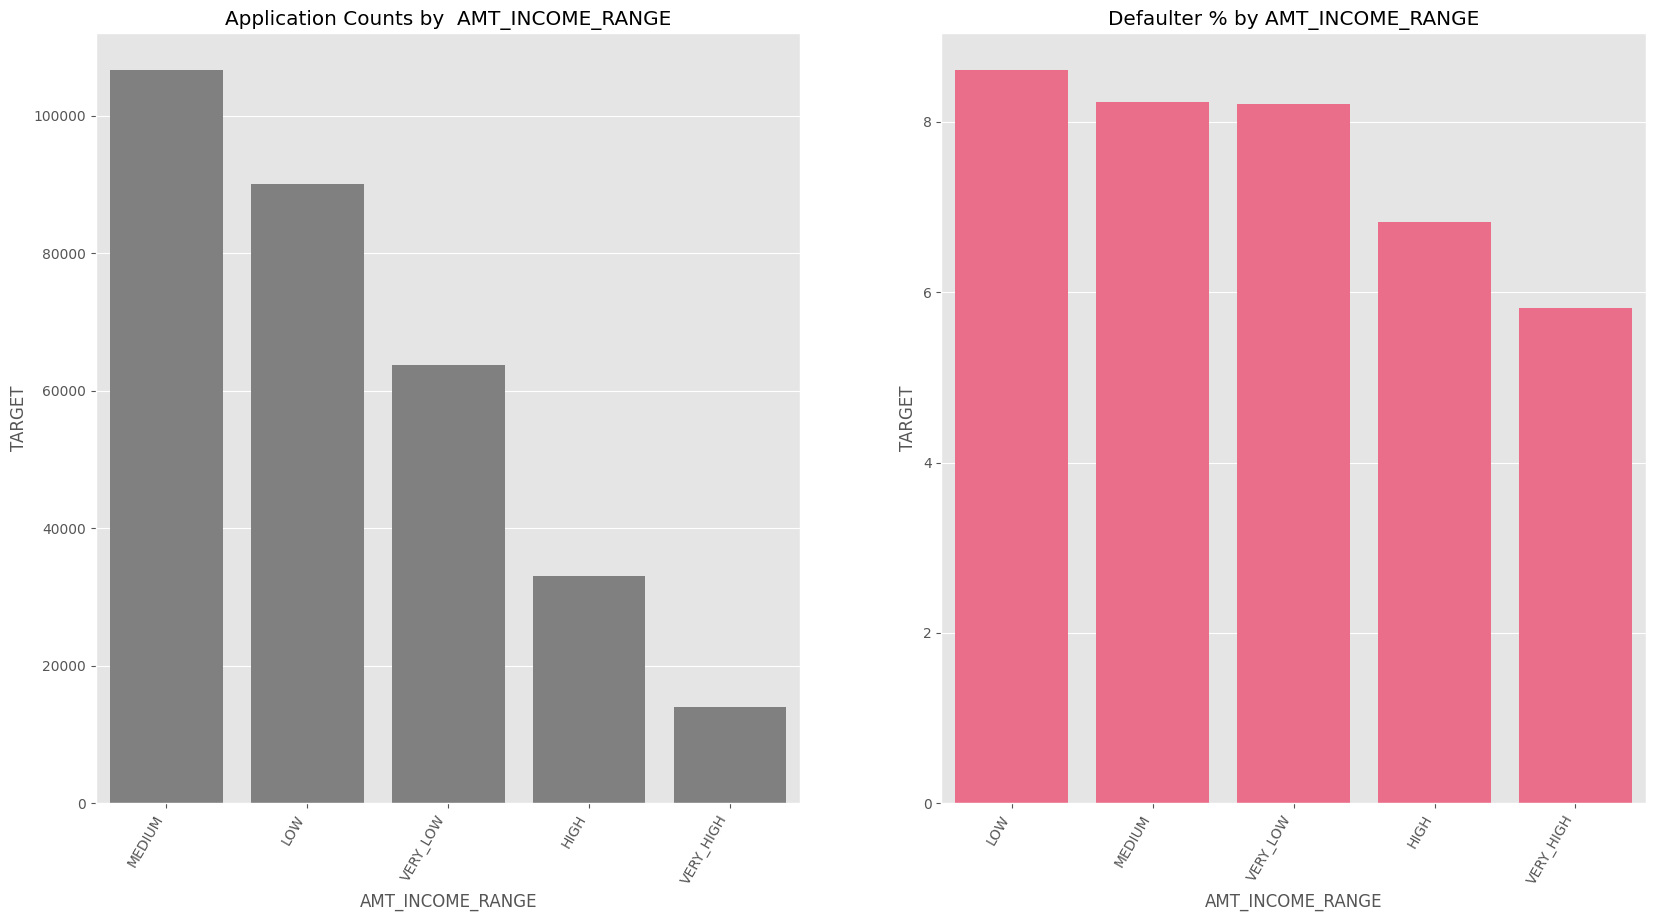

In [110]:
# Drilldown analysis of AMT_INCOME_RANGE

perc_defaulters('AMT_INCOME_RANGE')

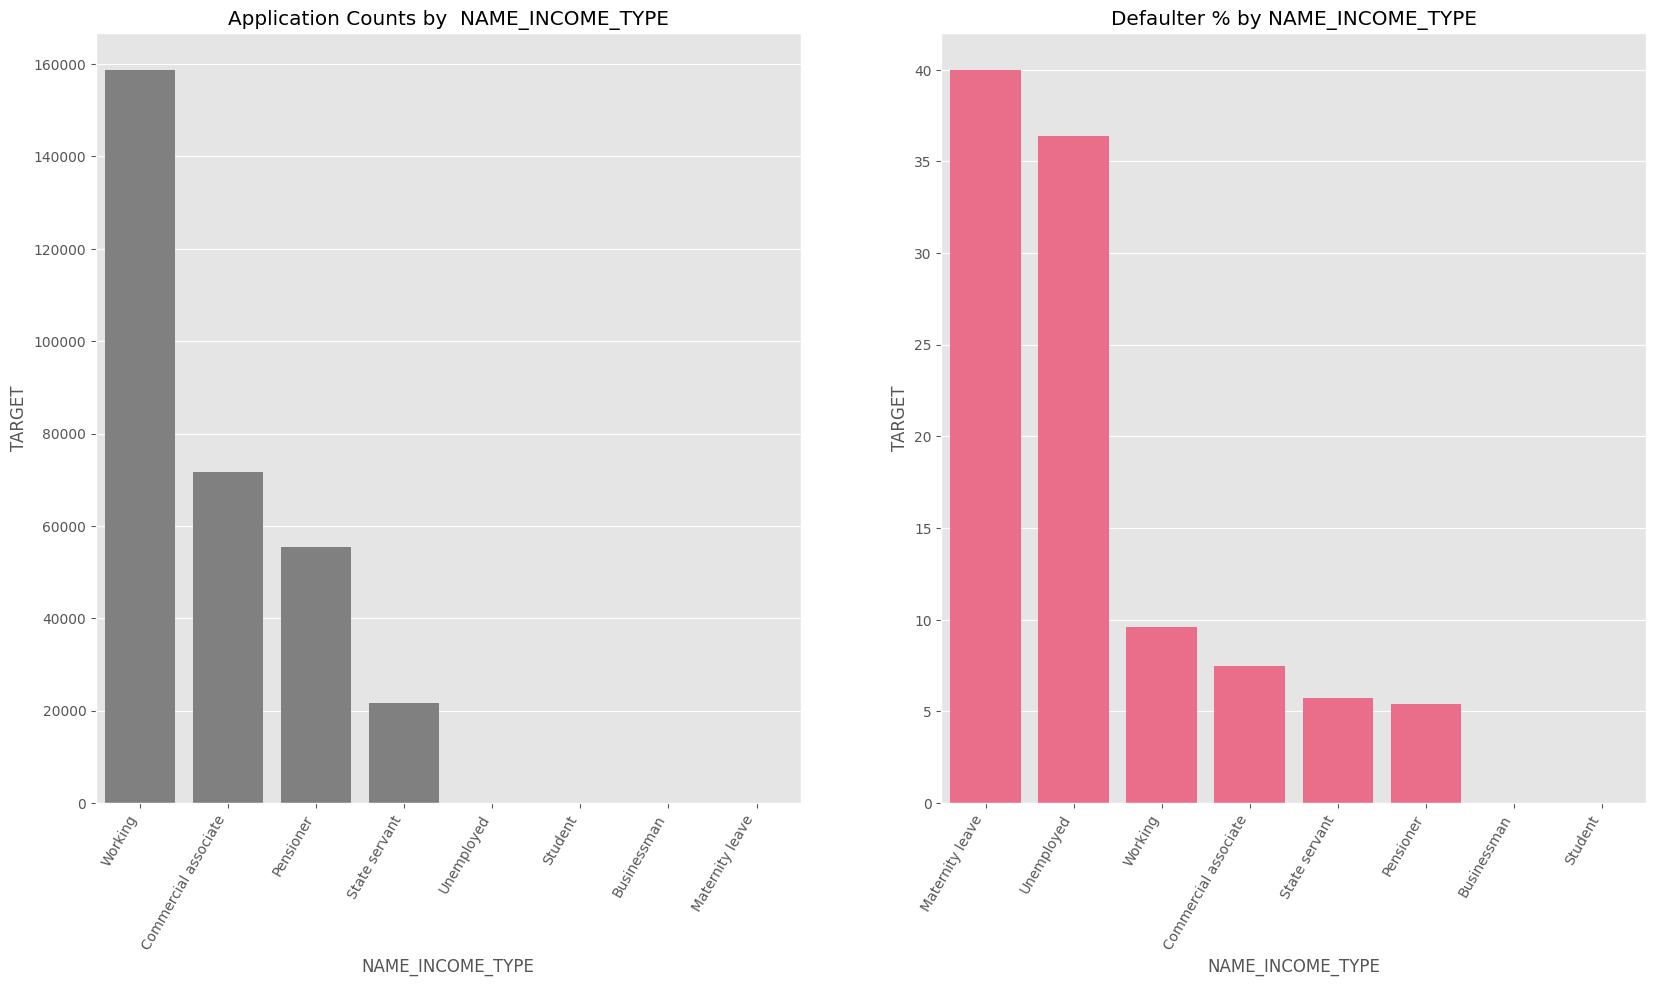

In [69]:
#analysis of NAME_INCOME_TYPE

perc_defaulters('NAME_INCOME_TYPE')

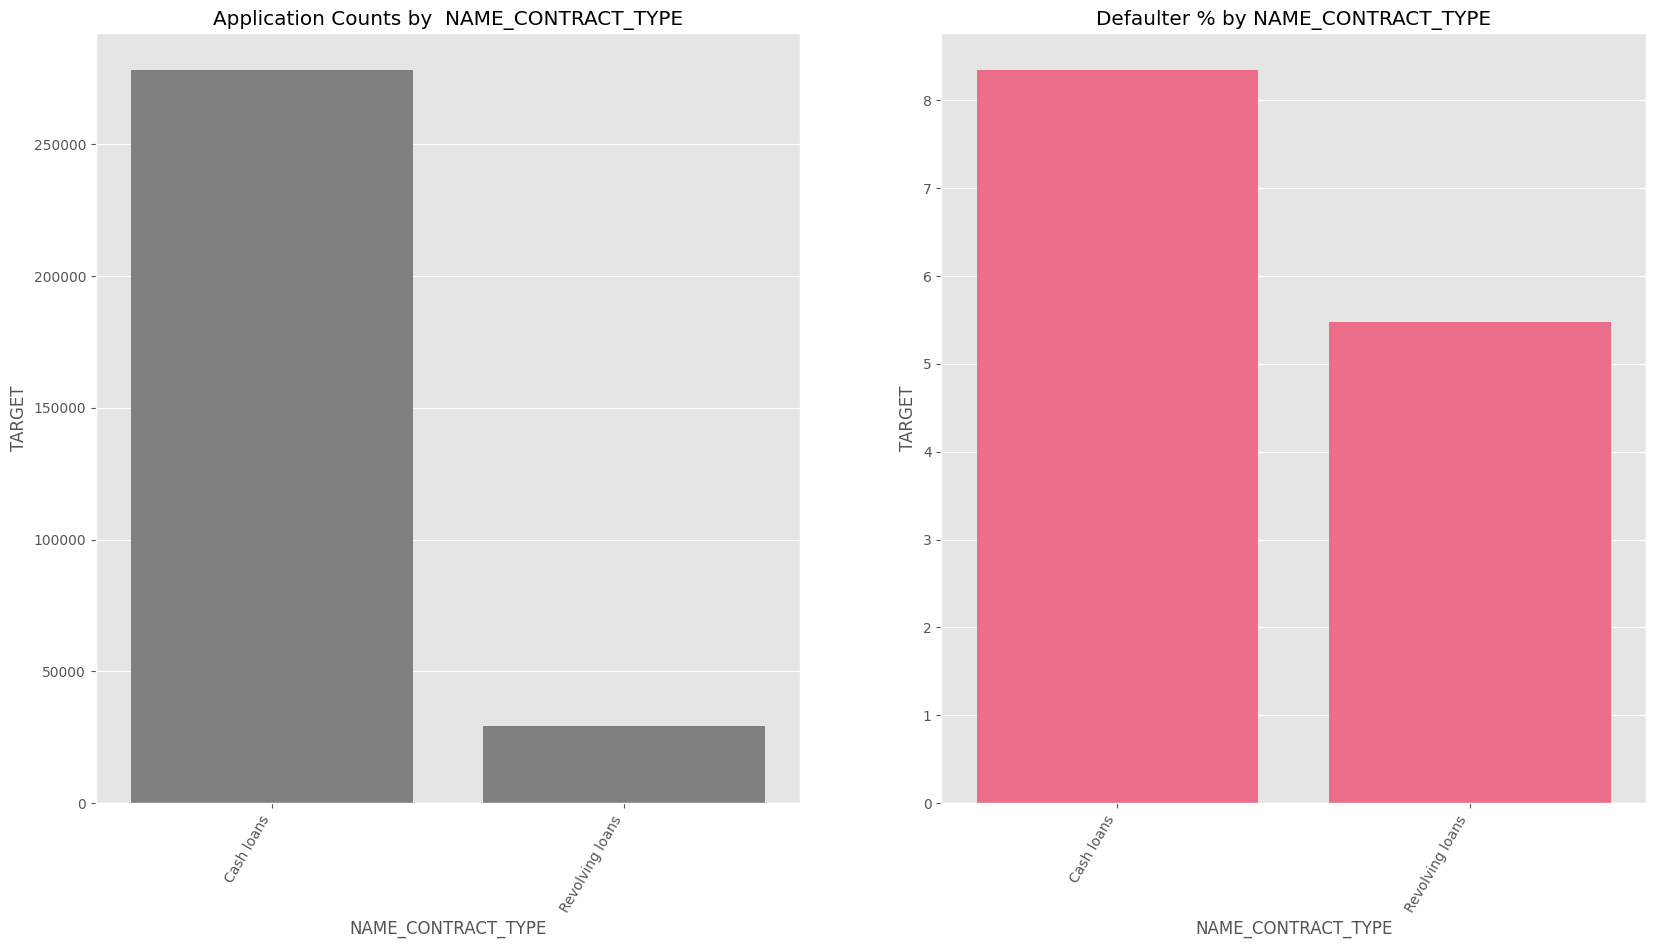

In [111]:
# Drilldown analysis of NAME_CONTRACT_TYPE
perc_defaulters('NAME_CONTRACT_TYPE')

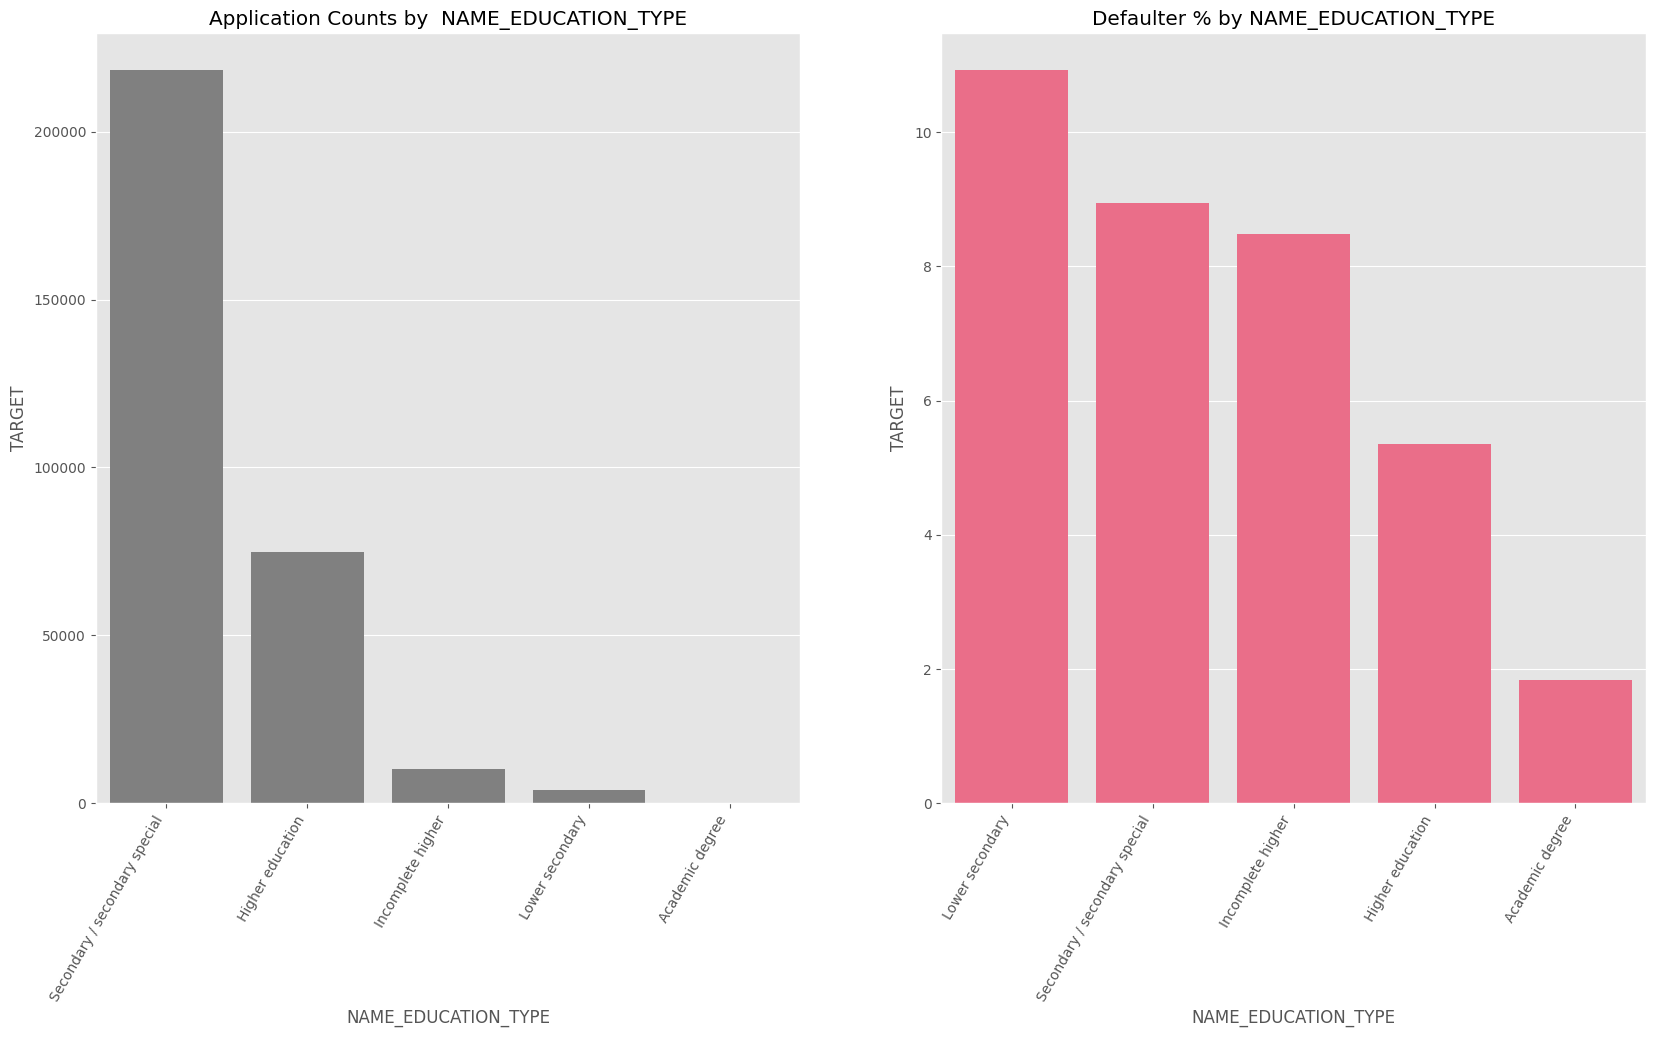

In [71]:
# Drilldown analysis of NAME_EDUCATION_TYPE
perc_defaulters('NAME_EDUCATION_TYPE')

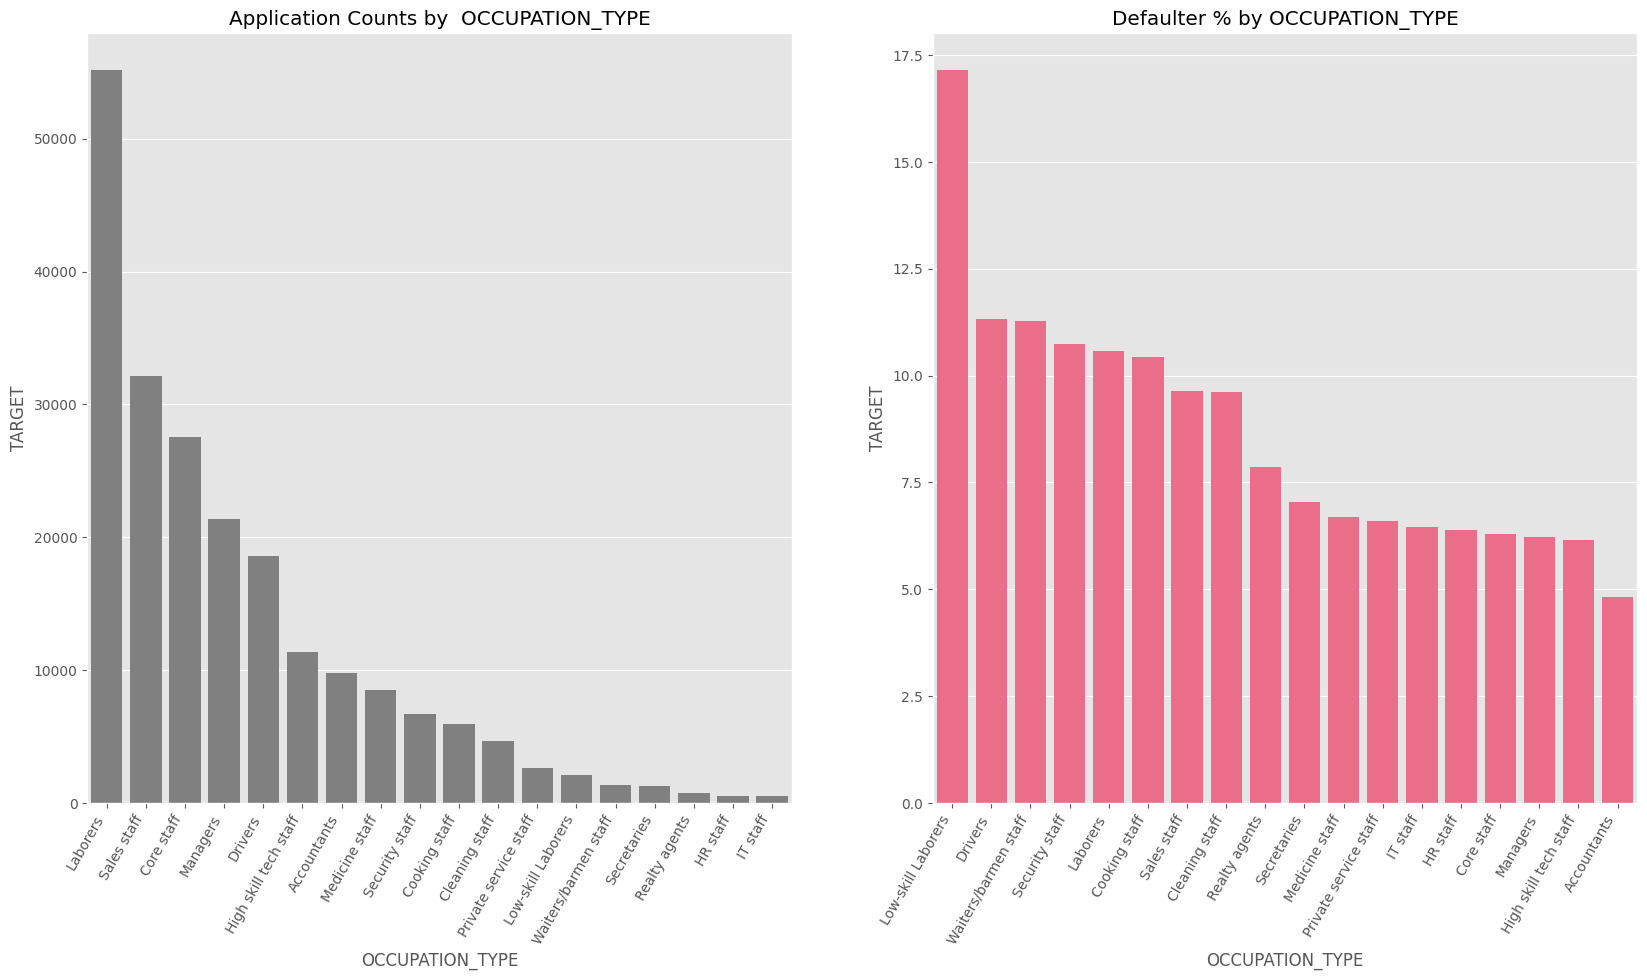

In [72]:
# Drilldown analysis of OCCUPATION_TYPE

perc_defaulters('OCCUPATION_TYPE')

In [73]:
perc_defaulters= pd.pivot_table(credit_data_2, values='TARGET', 
                      index=['CODE_GENDER','AMT_INCOME_RANGE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
perc_defaulters*100

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          5.606793   
            LOW                      0.000000          4.902183   
            MEDIUM                   0.000000          5.025389   
            HIGH                    10.526316          4.151552   
            VERY_HIGH                7.692308          3.728906   
M           VERY_LOW                 0.000000          8.041061   
            LOW                      0.000000          7.330468   
            MEDIUM                   0.000000          7.008598   
            HIGH                     0.000000          5.591114   
            VERY_HIGH                0.000000          4.407996   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   8.639863         8.019324   
            LOW                        8.007537        11.388889   
            MEDIUM                     7.843137         9.698276   
            HIGH                       7.431341         3.896104   
            VERY_HIGH                  8.225108         6.666667   
M           VERY_LOW                  12.396694        12.500000   
            LOW                        9.777778        14.285714   
            MEDIUM                     9.513024        15.051546   
            HIGH                       7.462687         8.163265   
            VERY_HIGH                  7.758621         6.451613   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               7.677801  
            LOW                                    7.952316  
            MEDIUM                                 7.569169  
            HIGH                                   7.073552  
            VERY_HIGH                              6.593002  
M           VERY_LOW                              11.806626  
            LOW                                   12.369265  
            MEDIUM                                11.346642  
            HIGH                                   9.348442  
            VERY_HIGH                              8.993853